In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ayush\Downloads\nifty50_closing_prices.csv")

print(df.head())

                        Date  RELIANCE.NS  HDFCBANK.NS  ICICIBANK.NS  \
0  2024-08-20 00:00:00+05:30  2991.899902  1637.699951   1179.449951   
1  2024-08-21 00:00:00+05:30  2997.350098  1625.800049   1174.849976   
2  2024-08-22 00:00:00+05:30  2996.250000  1631.300049   1191.099976   
3  2024-08-23 00:00:00+05:30  2999.949951  1625.050049   1203.500000   
4  2024-08-26 00:00:00+05:30  3025.199951  1639.949951   1213.300049   

       INFY.NS       TCS.NS  KOTAKBANK.NS  HINDUNILVR.NS      ITC.NS  \
0  1872.199951  4523.299805   1805.650024    2751.050049  498.799988   
1  1872.699951  4551.500000   1812.949951    2791.199951  505.399994   
2  1880.250000  4502.000000   1821.500000    2792.800049  504.549988   
3  1862.099976  4463.899902   1818.000000    2815.600098  505.799988   
4  1876.150024  4502.450195   1812.500000    2821.149902  505.700012   

         LT.NS  ...  HEROMOTOCO.NS   DRREDDY.NS   SHREECEM.NS  BRITANNIA.NS  \
0  3572.699951  ...    5244.399902  6965.350098  24730.

In [2]:
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
print(df.isnull().sum())

Date              0
RELIANCE.NS       0
HDFCBANK.NS       0
ICICIBANK.NS      0
INFY.NS           0
TCS.NS            0
KOTAKBANK.NS      0
HINDUNILVR.NS     0
ITC.NS            0
LT.NS             0
SBIN.NS           0
BAJFINANCE.NS     0
BHARTIARTL.NS     0
HCLTECH.NS        0
ASIANPAINT.NS     0
AXISBANK.NS       0
DMART.NS          0
MARUTI.NS         0
ULTRACEMCO.NS     0
HDFC.NS          24
TITAN.NS          0
SUNPHARMA.NS      0
M&M.NS            0
NESTLEIND.NS      0
WIPRO.NS          0
ADANIGREEN.NS     0
TATASTEEL.NS      0
JSWSTEEL.NS       0
POWERGRID.NS      0
ONGC.NS           0
NTPC.NS           0
COALINDIA.NS      0
BPCL.NS           0
IOC.NS            0
TECHM.NS          0
INDUSINDBK.NS     0
DIVISLAB.NS       0
GRASIM.NS         0
CIPLA.NS          0
BAJAJFINSV.NS     0
TATAMOTORS.NS     0
HEROMOTOCO.NS     0
DRREDDY.NS        0
SHREECEM.NS       0
BRITANNIA.NS      0
UPL.NS            0
EICHERMOT.NS      0
SBILIFE.NS        0
ADANIPORTS.NS     0
BAJAJ-AUTO.NS     0


There are 24 null values in the closing prices of HDFC. Let’s fill in these null values using the forward fill method

In [4]:
df.fillna(method='ffill', inplace=True)

C:\Users\ayush\AppData\Local\Temp\ipykernel_22404\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Now lets have a look at the stock price trends of all the companies in the data


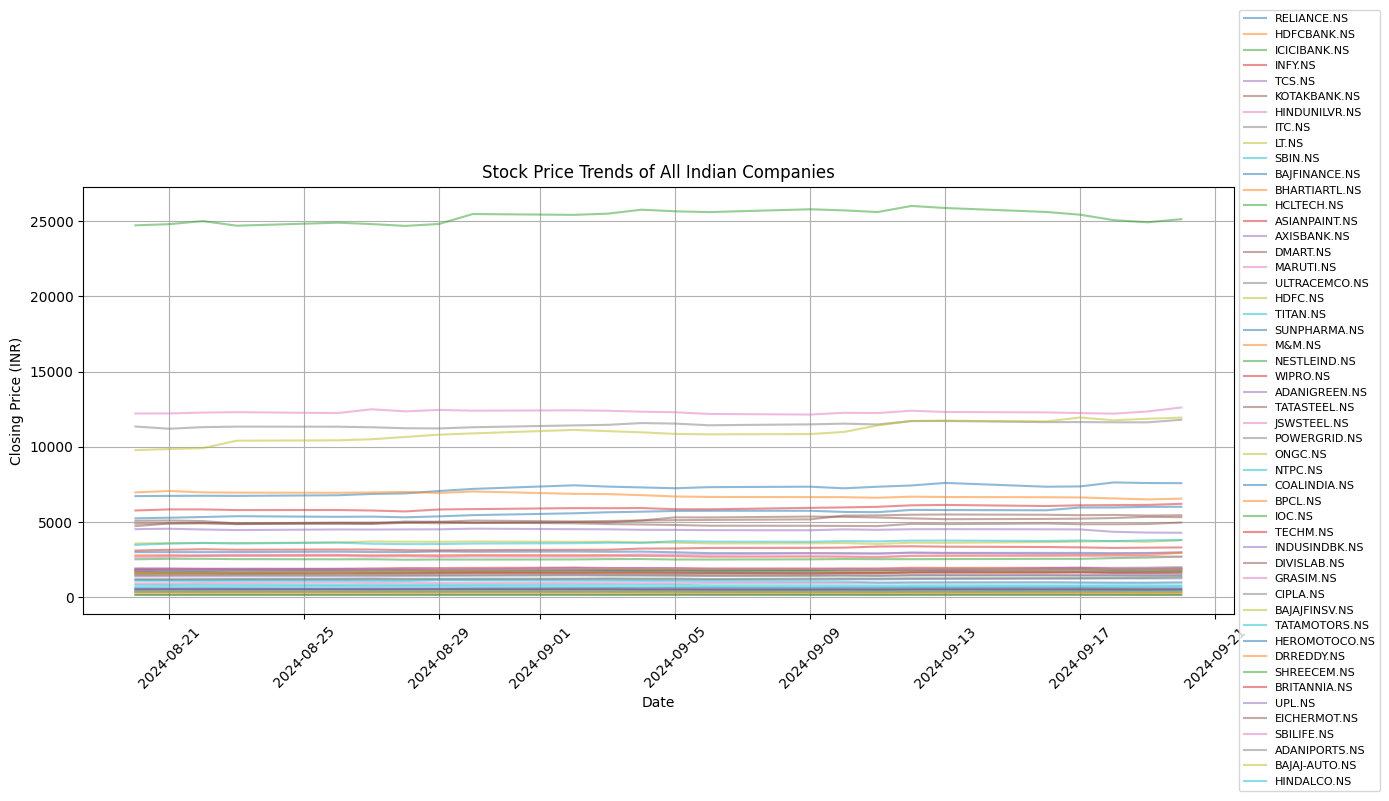

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))


for company in df.columns[1:]:
    plt.plot(df['Date'], df[company], label=company, alpha=0.5)


plt.title('Stock Price Trends of All Indian Companies')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
plt.tight_layout()  

plt.grid(True)
plt.show()


Lets look at the companies with the highest risks for investing

In [6]:
all_companies = df.columns[1:]

volatality_all_companies = df[all_companies].std()

volatality_all_companies.sort_values(ascending=False).head(10)

BAJAJ-AUTO.NS    659.810841
SHREECEM.NS      429.919834
BAJFINANCE.NS    306.658594
DIVISLAB.NS      247.674895
HEROMOTOCO.NS    247.092728
DRREDDY.NS       175.124908
ULTRACEMCO.NS    172.673053
DMART.NS         155.593701
BRITANNIA.NS     144.164343
MARUTI.NS        109.587342
dtype: float64

Now lets look at the companies with the highest growth rate for investing

In [7]:
growth_all_companies = df[all_companies].pct_change()*100

avg_growth_all_companies = growth_all_companies.mean()

avg_growth_all_companies.sort_values(ascending=False).head(10)

C:\Users\ayush\AppData\Local\Temp\ipykernel_22404\1709094970.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_all_companies = df[all_companies].pct_change()*100


BAJAJ-AUTO.NS    0.883421
BAJAJFINSV.NS    0.791730
BHARTIARTL.NS    0.735219
DIVISLAB.NS      0.634851
HEROMOTOCO.NS    0.602192
ICICIBANK.NS     0.557742
BAJFINANCE.NS    0.536819
TITAN.NS         0.393800
HINDUNILVR.NS    0.351634
BRITANNIA.NS     0.327747
dtype: float64

Now lets have a look at the companies with the highest return on investments

In [8]:
initial_prices = df[all_companies].iloc[0]

final_prices = df[all_companies].iloc[-1]

roi_all_companies = ((final_prices - initial_prices)/initial_prices)*100

roi_all_companies.sort_values(ascending=False).head(10)

BAJAJ-AUTO.NS    22.107017
BAJAJFINSV.NS    19.642973
BHARTIARTL.NS    18.120965
DIVISLAB.NS      15.404976
HEROMOTOCO.NS    14.660402
ICICIBANK.NS     13.480860
BAJFINANCE.NS    12.797149
TITAN.NS          9.275089
HINDUNILVR.NS     8.235039
BRITANNIA.NS      7.713587
dtype: float64

Creating a Mutual Fund Plan Based on High ROI and Low Risk

To create a strategy for selecting companies with high ROI and low risk, we can use a combination of ROI and volatility (standard deviation) metrics. The goal is to find companies that offer a high return on investment (ROI) but with low volatility to minimize risk.

Let’s start by defining thresholds and selecting companies that meet the criteria of high ROI and low volatility

In [9]:
roi_threshold = roi_all_companies.median()

volatality_threshold = volatality_all_companies.median()

select_companies = roi_all_companies[(roi_all_companies>roi_threshold) & (volatality_all_companies<volatality_threshold)]

select_companies.sort_values(ascending=False)

ICICIBANK.NS     13.480860
INDUSINDBK.NS     7.159914
JSWSTEEL.NS       7.021748
AXISBANK.NS       6.592466
HDFCBANK.NS       6.319839
SUNPHARMA.NS      5.627425
KOTAKBANK.NS      5.474481
CIPLA.NS          4.850117
NTPC.NS           4.356926
dtype: float64

An "inverse volatility ratio" refers to a portfolio weighting strategy where assets with higher volatility receive lower weights, and assets with lower volatility receive higher weights.

Companies with lower volatility will get a higher weight. Let’s calculate the weight for each company

In [10]:
selected_volatality = volatality_all_companies[select_companies.index]

inverse_volatality = 1/selected_volatality

investment_percentage = inverse_volatality/inverse_volatality.sum()

investment_percentage=investment_percentage.round(2).sort_values(ascending=False)
print((investment_percentage*100).apply(lambda x: f"{x:.2f}%"))

NTPC.NS          28.00%
JSWSTEEL.NS      16.00%
HDFCBANK.NS       9.00%
AXISBANK.NS       9.00%
KOTAKBANK.NS      8.00%
CIPLA.NS          8.00%
ICICIBANK.NS      7.00%
SUNPHARMA.NS      7.00%
INDUSINDBK.NS     7.00%
dtype: object


Analyzing Our Mutual Fund Plan

We have created a mutual fund plan for long-term investments. Now lets analyze and compare our mutual fund plan by comparing it with the high-performing companies in the stock market. Let’s start by comparing the risks in our mutual fund with the risk in the high growth companies

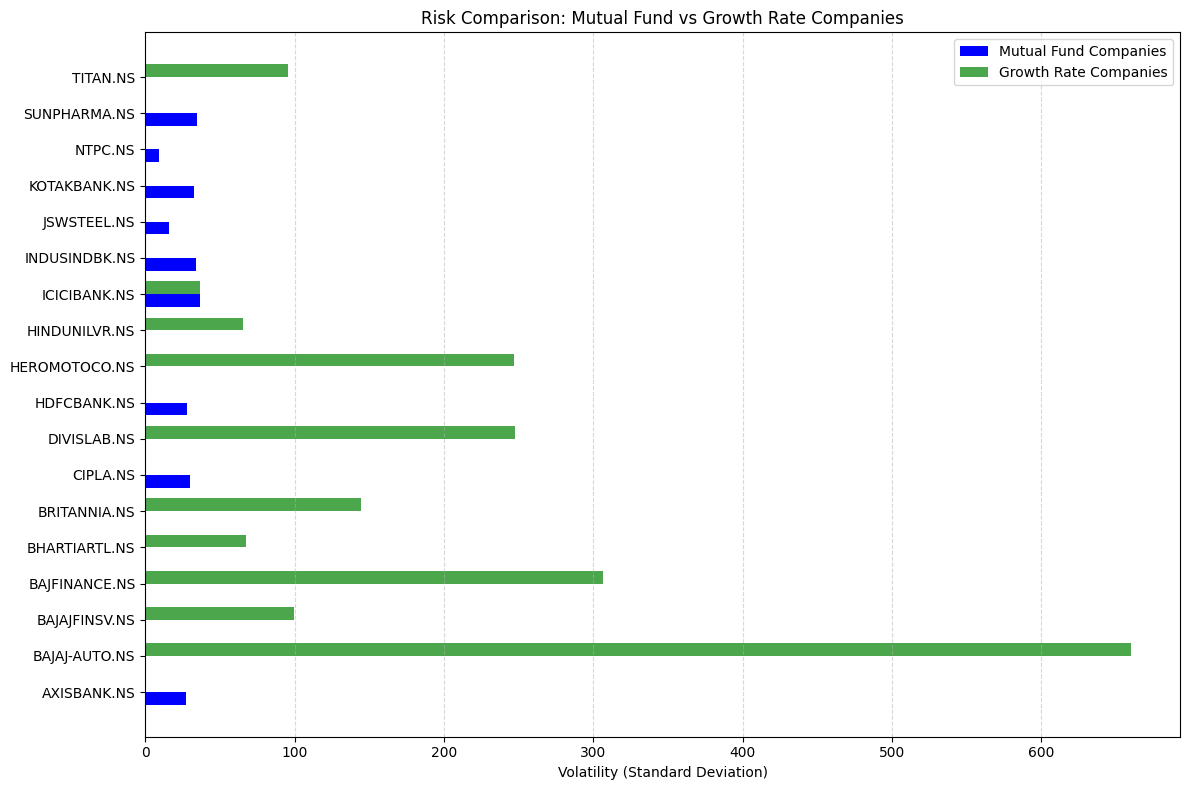

In [11]:
top_growth_companies = avg_growth_all_companies.sort_values(ascending=False).head(10)
risk_growth_rate_companies = volatality_all_companies[top_growth_companies.index]
risk_mutual_fund_companies = volatality_all_companies[select_companies.index]

import numpy as np

combined_df = pd.DataFrame({
    'Mutual Fund Companies': risk_mutual_fund_companies,
    'Growth Rate Companies': risk_growth_rate_companies
}).fillna(0)

companies = combined_df.index
y_pos = np.arange(len(companies))
bar_height = 0.35

plt.figure(figsize=(12, 8))

plt.barh(y_pos - bar_height/2, combined_df['Mutual Fund Companies'], height=bar_height, label='Mutual Fund Companies', color='blue')
plt.barh(y_pos + bar_height/2, combined_df['Growth Rate Companies'], height=bar_height, label='Growth Rate Companies', color='green', alpha=0.7)

plt.yticks(y_pos, companies)
plt.xlabel('Volatility (Standard Deviation)')
plt.title('Risk Comparison: Mutual Fund vs Growth Rate Companies')
plt.legend()
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.show()


Now lets compare the ROI of both the groups

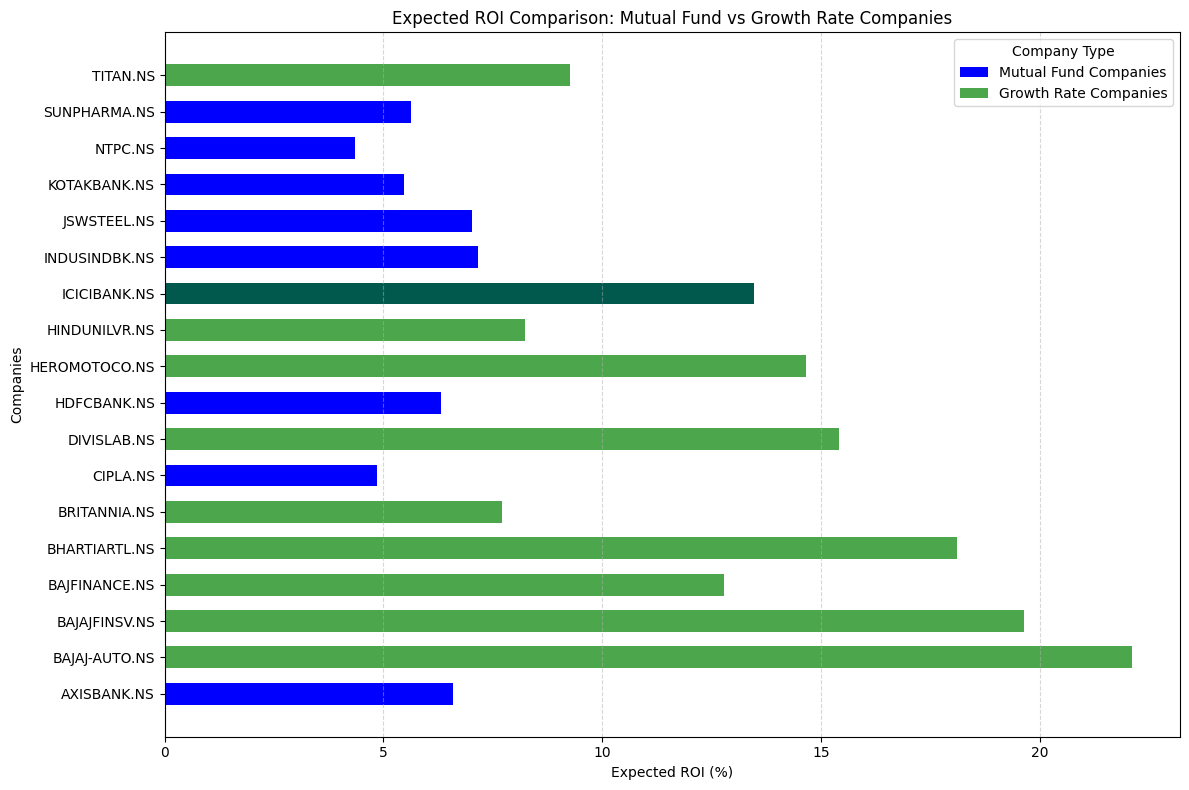

In [12]:

expected_roi_mutual_fund = roi_all_companies[select_companies.index]

expected_roi_growth_companies = roi_all_companies[top_growth_companies.index]


combined_df = pd.DataFrame({
    'Mutual Fund Companies': expected_roi_mutual_fund,
    'Growth Rate Companies': expected_roi_growth_companies
}).fillna(0)

companies = combined_df.index
y_pos = np.arange(len(companies))

plt.figure(figsize=(12, 8))


plt.barh(y_pos, combined_df['Mutual Fund Companies'], 
         height=0.6, color='blue', label='Mutual Fund Companies')

plt.barh(y_pos, combined_df['Growth Rate Companies'], 
         height=0.6, color='green', alpha=0.7, label='Growth Rate Companies')


plt.yticks(y_pos, companies)
plt.xlabel('Expected ROI (%)')
plt.ylabel('Companies')
plt.title('Expected ROI Comparison: Mutual Fund vs Growth Rate Companies')
plt.legend(title='Company Type')
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.show()


The comparison between mutual fund companies (blue) and growth rate companies (green) shows a clear trade-off between risk and return. Mutual fund companies have lower volatility, which means they are less risky, but their expected returns are also lower. On the other hand, growth rate companies come with higher volatility, making them riskier, but they offer much higher potential returns — especially companies like Bajaj Auto and Bajaj Finserv. This reflects a common investment situation: safer options usually give lower returns, while riskier choices can bring higher rewards.

For long-term investments, the goal is typically to find companies that offer a balance of stable returns and manageable risk. The companies in our mutual fund exhibit low volatility, meaning they are less risky, and their moderate returns make them solid choices for long-term, stable growth. They are well-suited for conservative investors who want steady returns without significant fluctuations in value.

Calculating Expected Returns

Now lets calculate the expected returns a person will get from our mutual fund if he/she invests ₹5000 every month.

To calculate the expected value a person will accumulate over 1 year, 3 years, 5 years, and 10 years through the mutual fund plan.

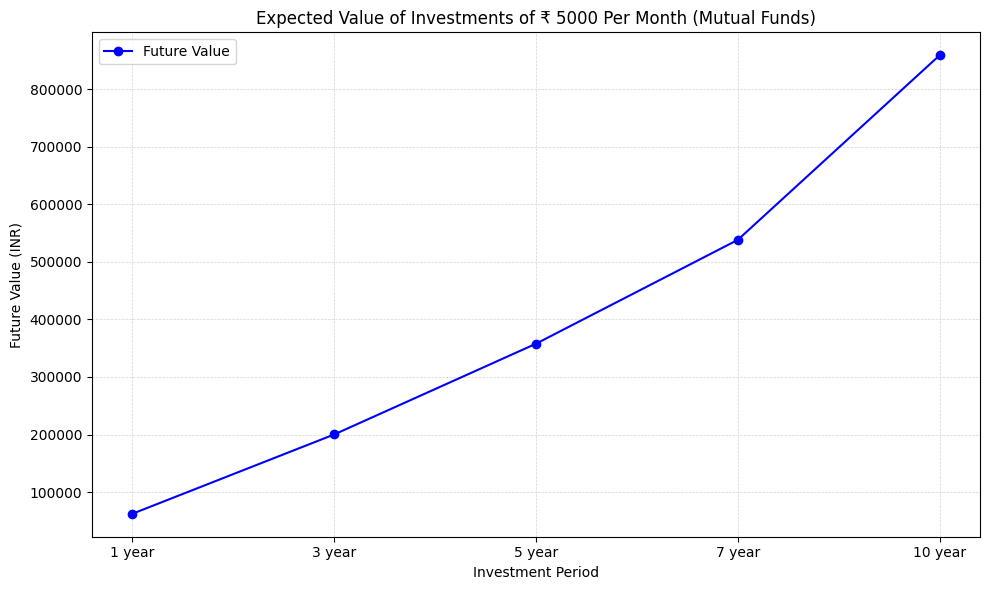

In [13]:


monthly_investment = 5000  # Monthly investment in INR
years = [1, 3, 5, 7, 10]    # Investment Period in Years
n = 12                     # Compounded monthly

avg_roi = expected_roi_mutual_fund.mean() / 100  # Convert to decimal

def future_returns(P, r, n, t):
    return P * (((1 + r/n)**(n*t) - 1) / (r/n)) * (1 + r/n)

# Calculate future value for each investment period
future_returns_values = [future_returns(monthly_investment, avg_roi, n, t) for t in years]

# Create labels like "1 year", "3 year", etc.
x_labels = [f"{year} year" for year in years]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_labels, future_returns_values, marker='o', color='blue', label='Future Value')
plt.title("Expected Value of Investments of ₹ 5000 Per Month (Mutual Funds)")
plt.xlabel("Investment Period")
plt.ylabel("Future Value (INR)")
plt.grid(True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


After 1 year, the accumulated value is around ₹62,000, and by 5 years, it grows to over ₹300,000. The long-term benefit is evident, with the investment growing to nearly ₹860,000 over 10 years, which emphasises the value of consistent investing and compounding over time for long-term investors.